#Medical Insurance Cost Prediction

## Importing required libraries

In [ ]:
pip install tensorflow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import FunctionTransformer,LabelEncoder,OneHotEncoder,OrdinalEncoder,StandardScaler,MinMaxScaler

from sklearn.model_selection import train_test_split
from __future__ import absolute_import, division, print_function, unicode_literals
from IPython.display import clear_output
import tensorflow.compat.v2.feature_column as fc
from sklearn.model_selection import cross_val_score, KFold

warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
!pip install -q sklearn


## Import and glimpse data

In [ ]:
df = pd.read_csv('insurance.csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**bmi** - body mass index

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(1337, 7)

In [ ]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


##Exploratory Data Analysis

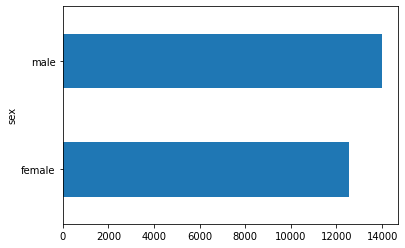

In [ ]:
df['charges'].groupby(by=df['sex']).mean().plot(kind='barh')

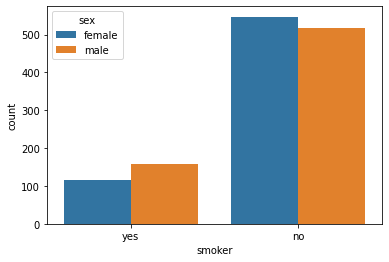

In [ ]:
sns.countplot(df['smoker'],hue=df['sex'])

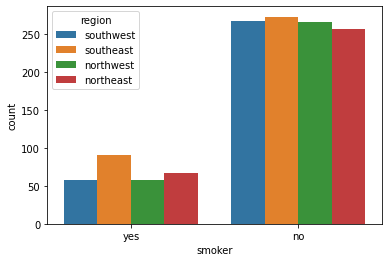

In [ ]:
sns.countplot(df['smoker'],hue=df['region'])

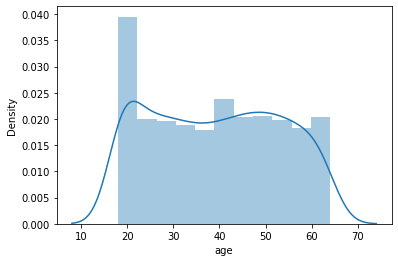

In [ ]:
sns.distplot(df['age'],kde=True)

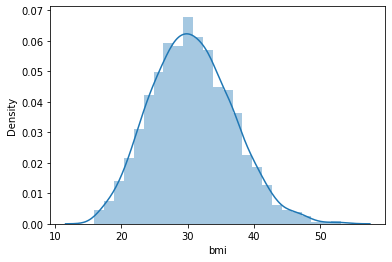

In [ ]:
sns.distplot(df['bmi'])

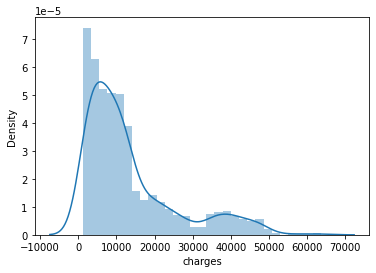

In [ ]:
sns.distplot(df['charges'])

In [ ]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4])

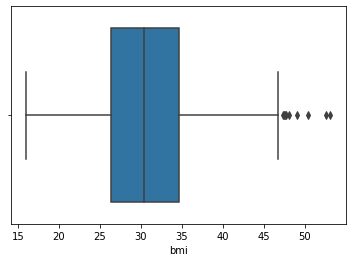

In [ ]:
sns.boxplot(df['bmi'])

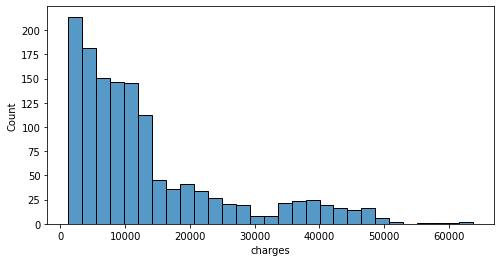

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(data=df, x = 'charges' )

In [ ]:
df.charges = np.log1p(df.charges)

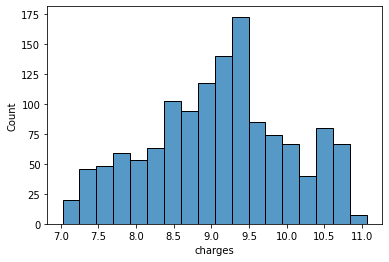

In [ ]:
sns.histplot(data=df, x = 'charges' )

In [ ]:
cat_vars = ['sex','smoker', 'region']


In [ ]:
X= df.drop('charges',axis=1)
y= df['charges']

##Model Implementation

In [ ]:
# Divide data into training and validation subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                      train_size=0.75,
                                                      test_size=0.25,
                                                      random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

num_vars = ['age','bmi']

numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())])

# preprocessor = ColumnTransformer(transformers=[
#     ('num',numeric_transformer,num_vars)])

categoric_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder())])

preprocessor = ColumnTransformer(transformers=[
   ('num',numeric_transformer,num_vars),
   ('cat',categoric_transformer, cat_vars)])

In [ ]:
data_pipeline = Pipeline(steps = [
                                    ('preprocessor', preprocessor),
                                    ('model', LinearRegression(copy_X = True, fit_intercept = True, normalize = True))])

In [ ]:
data_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'bmi']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('model', LinearRegression(normalize=True))])

In [ ]:
y_pred=data_pipeline.predict(X_test)

In [ ]:
r2_score(y_test,y_pred)

0.8030111570274345

##Tensorflow Linear Regression

In [480]:
pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [479]:
import tensorflow_addons as tfa

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,9.734236
1,18,male,33.770,1,no,southeast,7.453882
2,28,male,33.000,3,no,southeast,8.400763
3,33,male,22.705,0,no,northwest,9.998137
4,32,male,28.880,0,no,northwest,8.260455
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,9.268755
1334,18,female,31.920,0,no,northeast,7.699381
1335,18,female,36.850,0,no,southeast,7.396847
1336,21,female,25.800,0,no,southwest,7.605365


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                      train_size=0.75,
                                                      test_size=0.25)

In [ ]:
CATEGORICAL_COLUMNS = ['sex', 'smoker', 'region']
NUMERIC_COLUMNS = ['age', 'bmi','children']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = X_train[feature_name].unique()  # gets a list of all unique values from given feature column
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='smoker', vocabulary_list=('no', 'yes'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='region', vocabulary_list=('northwest', 'southwest', 'southeast', 'northeast'), dtype=tf.string, default_value=-1, num_oov_buckets=0), NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='bmi', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='children', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [ ]:
def make_input_function(data, label_data, num_epochs=10, shuffle=True, batch_size=32):
    def input_function(): #innner function, this will be returned
        ds = tf.data.Dataset.from_tensor_slices((dict(data), label_data)) #create tf.data.Dataset object with data and its label
    
        if shuffle:
            ds = ds.shuffle(1000) #randomize order of data
        ds = ds.batch(batch_size).repeat(num_epochs) # split dataset into batches of 32 and repeat process for num_epochs times
        return ds  # return a batch of the dataset
    return input_function # return a function object

train_data = make_input_function(X_train, y_train)
eval_data = make_input_function(X_test, y_test, num_epochs=1, shuffle=False)

## Model implementation

In [ ]:
lr = tf.estimator.LinearRegressor(feature_columns=feature_columns)
# We create a linear estimtor by passing the feature columns we created earlier

INFO:tensorflow:Using default config.


INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmppuq8507r', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmppuq8507r', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [ ]:
lr.train(train_data)  # train

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...


INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmppuq8507r/model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmppuq8507r/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


INFO:tensorflow:loss = 82.28421, step = 0


INFO:tensorflow:loss = 82.28421, step = 0


INFO:tensorflow:global_step/sec: 420.872


INFO:tensorflow:global_step/sec: 420.872


INFO:tensorflow:loss = 1.1247168, step = 100 (0.249 sec)


INFO:tensorflow:loss = 1.1247168, step = 100 (0.249 sec)


INFO:tensorflow:global_step/sec: 672.685


INFO:tensorflow:global_step/sec: 672.685


INFO:tensorflow:loss = 1.032662, step = 200 (0.145 sec)


INFO:tensorflow:loss = 1.032662, step = 200 (0.145 sec)


INFO:tensorflow:global_step/sec: 698.002


INFO:tensorflow:global_step/sec: 698.002


INFO:tensorflow:loss = 0.8027415, step = 300 (0.144 sec)


INFO:tensorflow:loss = 0.8027415, step = 300 (0.144 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 320...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 320...


INFO:tensorflow:Saving checkpoints for 320 into /tmp/tmppuq8507r/model.ckpt.


INFO:tensorflow:Saving checkpoints for 320 into /tmp/tmppuq8507r/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 320...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 320...


INFO:tensorflow:Loss for final step: 0.5969675.


INFO:tensorflow:Loss for final step: 0.5969675.


In [ ]:
result = lr.evaluate(eval_data)

clear_output()

print(result)

{'average_loss': 0.67698026, 'label/mean': 9.058056, 'loss': 0.665693, 'prediction/mean': 8.743569, 'global_step': 320}


In [ ]:
pred_dicts = list(lr.predict(eval_data))


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmppuq8507r/model.ckpt-320


INFO:tensorflow:Restoring parameters from /tmp/tmppuq8507r/model.ckpt-320


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


In [ ]:
pred_dicts

[{'predictions': array([8.774366], dtype=float32)},
 {'predictions': array([6.4134946], dtype=float32)},
 {'predictions': array([9.279296], dtype=float32)},
 {'predictions': array([8.372091], dtype=float32)},
 {'predictions': array([8.848103], dtype=float32)},
 {'predictions': array([9.406155], dtype=float32)},
 {'predictions': array([9.014349], dtype=float32)},
 {'predictions': array([10.432897], dtype=float32)},
 {'predictions': array([10.052407], dtype=float32)},
 {'predictions': array([7.19823], dtype=float32)},
 {'predictions': array([9.261374], dtype=float32)},
 {'predictions': array([7.5536656], dtype=float32)},
 {'predictions': array([8.317301], dtype=float32)},
 {'predictions': array([9.435149], dtype=float32)},
 {'predictions': array([6.61167], dtype=float32)},
 {'predictions': array([9.92615], dtype=float32)},
 {'predictions': array([7.828489], dtype=float32)},
 {'predictions': array([9.514277], dtype=float32)},
 {'predictions': array([8.285263], dtype=float32)},
 {'predicti

In [477]:
s = pd.Series(pred_dicts)
preds = [pred['predictions'] for pred in s]
preds_series = np.array(pd.Series(preds),dtype=np.float32)
preds_series

array([ 8.774366 ,  6.4134946,  9.279296 ,  8.372091 ,  8.848103 ,
        9.406155 ,  9.014349 , 10.432897 , 10.052407 ,  7.19823  ,
        9.261374 ,  7.5536656,  8.317301 ,  9.435149 ,  6.61167  ,
        9.92615  ,  7.828489 ,  9.514277 ,  8.285263 ,  9.02145  ,
        7.1967015,  8.896531 ,  9.294531 , 10.192042 ,  8.546584 ,
        8.915544 ,  7.443328 ,  7.5963945,  8.113611 ,  9.417595 ,
        9.946365 ,  9.623257 ,  8.434746 , 10.687943 ,  9.926219 ,
        9.692843 ,  9.983676 ,  9.095354 ,  7.1963735,  7.940066 ,
        9.073326 ,  9.839097 ,  7.4673853,  9.259624 ,  9.922969 ,
        8.774173 ,  7.754068 ,  6.9837794,  9.367797 ,  7.6109705,
        7.0630546,  9.232392 ,  8.274768 , 10.7201805,  9.9833975,
        6.9973874,  7.205654 , 10.187081 ,  9.440506 ,  7.072484 ,
        7.5868034,  7.4909368, 10.830361 ,  7.1380277, 10.3779125,
        7.518132 ,  7.026222 ,  6.659967 ,  7.253928 ,  8.512791 ,
        9.388356 ,  7.385373 ,  8.802945 ,  8.477208 ,  7.5320

In [478]:
metric = tfa.metrics.r_square.RSquare()
metric.update_state(y_test, y_pred)
result1 = metric.result()
result1.numpy()
print(result1)

tf.Tensor(0.19958323, shape=(), dtype=float32)


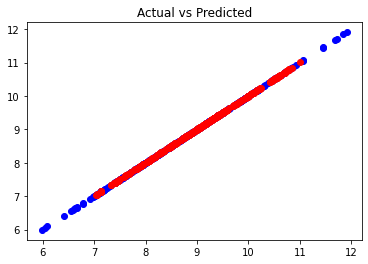

In [474]:
plt.scatter(y_pred, y_pred, color='blue')
plt.scatter(y_test, y_test, color='red')
plt.title('Actual vs Predicted')
plt.show()